---------------------------------------

Line Segmentation Using Only open CV / Prototype Testing (Actual testing)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

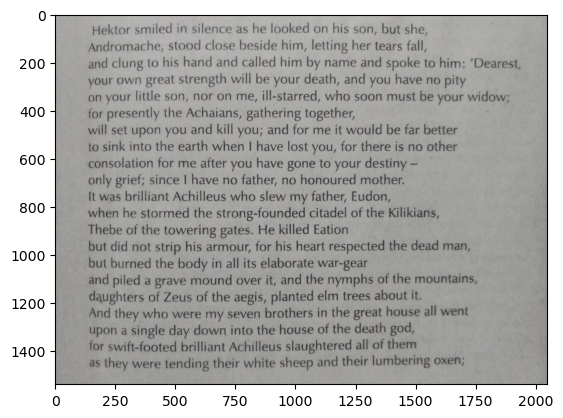

In [6]:
img = cv2.imread('../Text_segmentation/sample_img (5).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define the desired DPI
target_dpi = 500

# Get the current dimensions of the image
h, w, c = img.shape

# Calculate the physical size of the image in inches
image_width_inches = w / target_dpi
image_height_inches = h / target_dpi

# Calculate the new dimensions to achieve the desired DPI
new_width = int(image_width_inches * target_dpi)
new_height = int(image_height_inches * target_dpi)

# Resize the image while maintaining the aspect ratio
img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

plt.imshow(img)

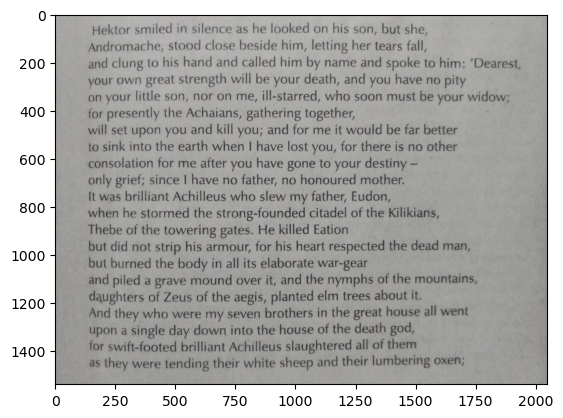

In [7]:
import cv2

def detect_text_blocks(image_path):
    # Read the image
    img = image_path
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Create an MSER object
    mser = cv2.MSER_create()
    
    # Detect MSER regions
    regions, _ = mser.detectRegions(gray)
    
    # Filter regions based on size to keep only larger areas (potential text blocks)
    filtered_regions = [p for p in regions if cv2.contourArea(p) > 10000]
    
    # Draw bounding boxes around the filtered regions
    for region in filtered_regions:
        x, y, w, h = cv2.boundingRect(region)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Display the result
    plt.imshow(img)
    
# Example usage
image_path = img.copy()
detect_text_blocks(image_path)


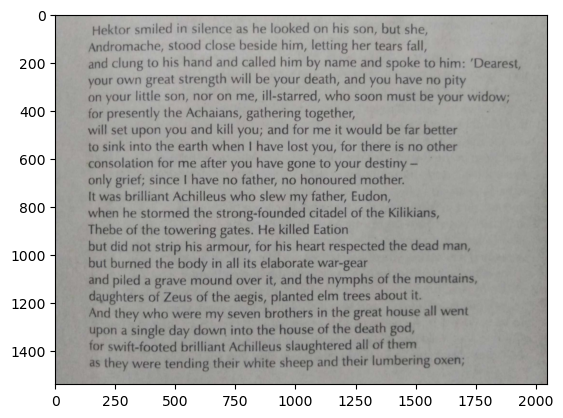

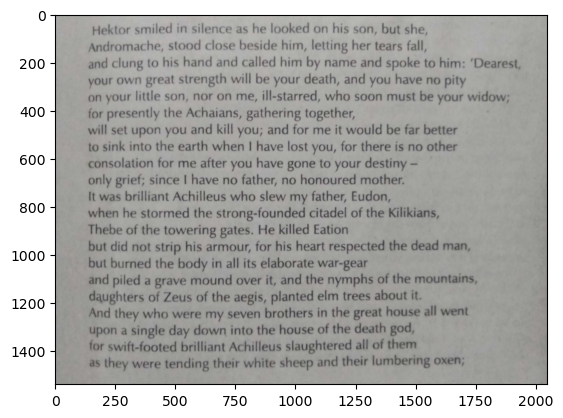

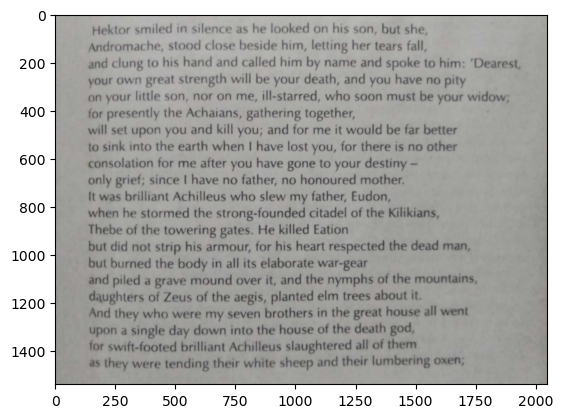

In [8]:

#Noise reduction using Gaussian blur
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(blurred_img)
plt.show()

blur = cv2.bilateralFilter(blurred_img,7,100,100)
plt.imshow(blur)
plt.show()

median_filtered = cv2.medianBlur(blur, 5) 
plt.imshow(median_filtered)
plt.show()


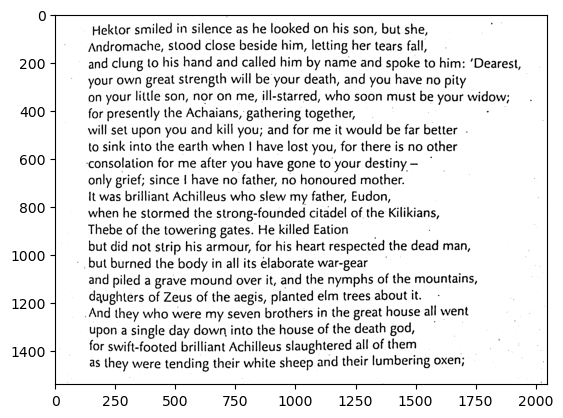

In [9]:
def adptThresholding(image):
    img_gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    adptThresh = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)
    plt.imshow(adptThresh,cmap='gray')
    return adptThresh

adpt_thresh_img = adptThresholding(median_filtered)

In [10]:
def thresholding(image):
    ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh,cmap='gray')
    return thresh

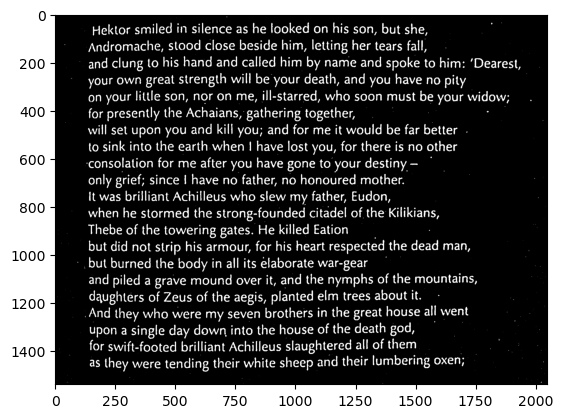

In [11]:
thresh_img = thresholding(adpt_thresh_img)

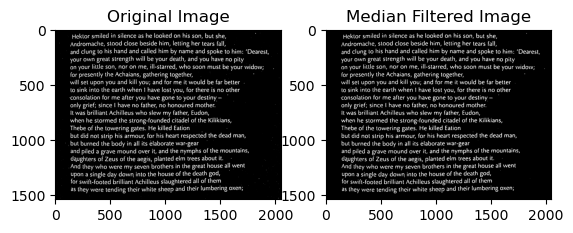

In [12]:
# Apply a median filter
median_filtered = cv2.medianBlur(thresh_img, 5)  # The second parameter is the kernel size (must be an odd number)

# Display the original and filtered images (optional)
plt.subplot(121)
plt.imshow(cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(122)
plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')

plt.show()

Text(0.5, 1.0, 'Median Filtered Image')

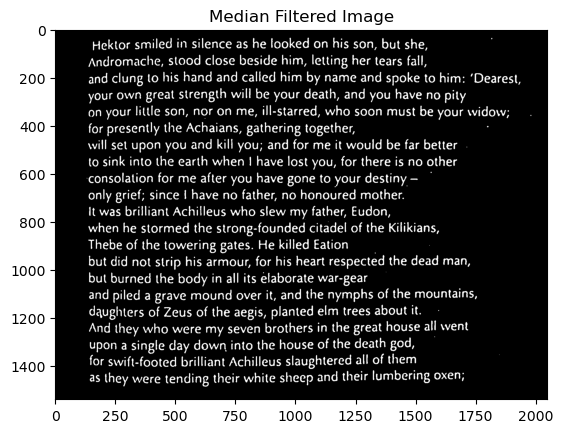

In [13]:
plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')

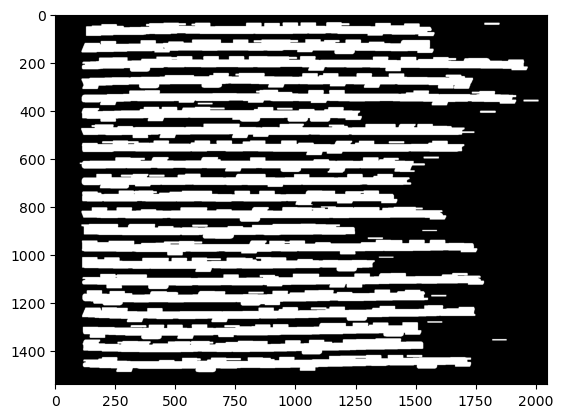

In [14]:
#Dilation By lines
kernel =np.ones((4,60), np.uint8)
dilated = cv2.dilate(median_filtered,kernel,iterations=1)
plt.imshow(dilated,cmap='gray')

In [15]:
(contours, heirarchy) = cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key =lambda ctr :cv2.boundingRect(ctr)[1]) #sorts line from top to botton

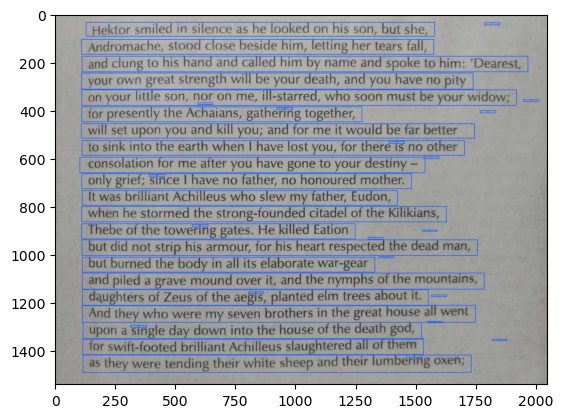

In [16]:
img2 = img.copy()

for ctr in sorted_contours_lines:

    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2,(x,y),(x+w, y+h), (40,100,250),2)
    
plt.imshow(img2)

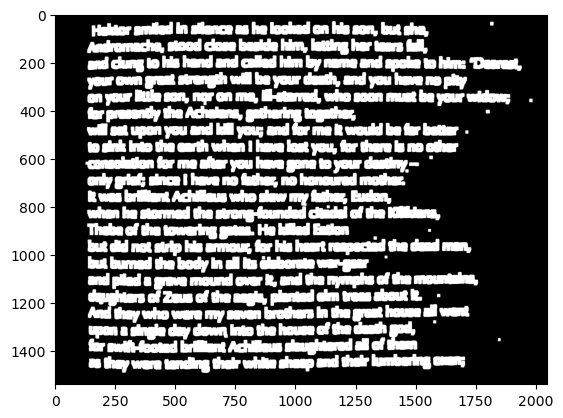

In [25]:
height, width = median_filtered.shape[:2]

factor_w = 160
factor_h = 130
# Calculate the kernel size based on the factor
kernel_size = min(height/ factor_h, width/ factor_w)

kernel_size = int(kernel_size)

# Create a square kernel with the calculated size
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform dilation
dilated2 = cv2.dilate(median_filtered, kernel, iterations=1)

# Display the result
plt.imshow(dilated2, cmap='gray')
plt.show()


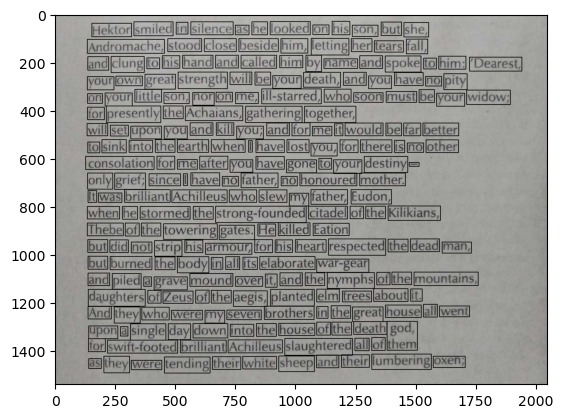

In [26]:
img4=img.copy()

# Perform Connected Component Analysis (CCA) on the connected image
_, labels, stats, _ = cv2.connectedComponentsWithStats(dilated2, connectivity=8)

# Filter out small components (adjust min_size as needed)
min_size = 500
valid_stats = [stat for stat in stats[1:] if stat[4] > min_size]

# Create bounding boxes for valid components
words = [(stat[0], stat[1], stat[0] + stat[2], stat[1] + stat[3]) for stat in valid_stats]

for line in sorted_contours_lines:
    # ROI per line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y + h, x:x + w]

    for word in words:
        x, y, w, h = word
        cv2.rectangle(img4, (x, y), (w, h), (0, 0, 0), 2)

plt.imshow(img4)
plt.show( )

Error processing line 1: Command '['python', 'src/predict.py']' returned non-zero exit status 1.
Error processing line 7: Command '['python', 'src/predict.py']' returned non-zero exit status 1.
Error processing line 10: Command '['python', 'src/predict.py']' returned non-zero exit status 1.
Error processing line 18: Command '['python', 'src/predict.py']' returned non-zero exit status 1.
Error processing line 16: Command '['python', 'src/predict.py']' returned non-zero exit status 1.
Error processing line 25: Command '['python', 'src/predict.py']' returned non-zero exit status 1.
hektor smiled in silence as he looked on his sont but shel
andromache stood close beside him letting her tears fall
and clung to his hand and called him by name and spoke to hims dearest
youn lown great strength willi be your death and you havel no pity
on your little soni nor on mer illuaed whol soon must be your widown
for presently the achaianst gathering together
willi set upon you and kill youf and for me 

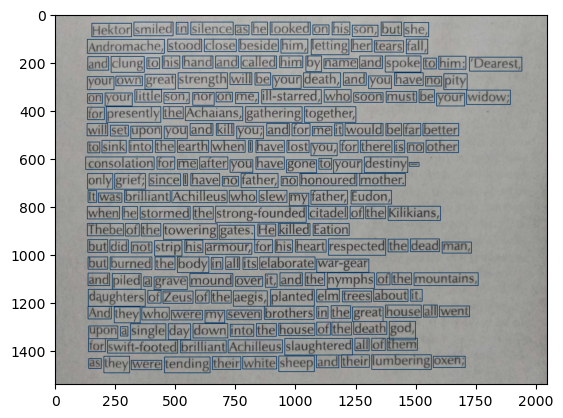

In [32]:
import os
import cv2
import tempfile
from concurrent.futures import ThreadPoolExecutor
import subprocess

img3 = img.copy()

# Assuming sorted_contours_lines is a list of contours
sorted_contours_lines = sorted(sorted_contours_lines, key=lambda line: (cv2.boundingRect(line)[1], cv2.boundingRect(line)[0]))

# Variable to store predictions with order
all_predictions_with_order = []

def process_line(line, line_order):
    try:
        x, y, w, h = cv2.boundingRect(line)
        roi_line = dilated2[y:y + h, x:x + w]

        # Connected Component Analysis (CCA) for word detection
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(roi_line, connectivity=8)

        # Filter out small components (adjust min_size as needed)
        min_size = 500
        valid_stats = [stat for stat in stats[1:] if stat[4] > min_size]

        # Create bounding boxes for valid components
        words = [(stat[0], stat[1], stat[0] + stat[2], stat[1] + stat[3]) for stat in valid_stats]

        # Sort words based on the x-coordinate of the bounding boxes
        sorted_words = sorted(words, key=lambda box: box[0])

        with tempfile.TemporaryDirectory() as temp_dir:
            batch_temp_file_paths = []

            for word_box in sorted_words:
                x2, y2, x2_end, y2_end = word_box
                cv2.rectangle(img3, (x + x2, y + y2), (x + x2_end, y + y2_end), (0, 50, 100), 2)
                cropped_img = img3[y + y2: y + y2_end, x + x2: x + x2_end]

                # Save the cropped image to a temporary file
                temp_file_path = os.path.join(temp_dir, "temp_cropped_img{}.png".format(len(batch_temp_file_paths)))
                cv2.imwrite(temp_file_path, cropped_img)
                batch_temp_file_paths.append(temp_file_path)

            # Execute the script with the paths to the temporary files (batch)
            prediction_batch = subprocess.check_output(['python', 'src/predict.py'] + batch_temp_file_paths, stderr=subprocess.STDOUT, universal_newlines=True)

            # Concatenate predictions with space between words
            line_prediction = " ".join(prediction_batch.split())
            all_predictions_with_order.append((line_order, line_prediction))
    except Exception as e:
        print(f"Error processing line {line_order}: {e}")

# Use ThreadPoolExecutor's map method to maintain order
with ThreadPoolExecutor() as executor:
    for i, line in enumerate(sorted_contours_lines):
        executor.submit(process_line, line, i)

# Sort predictions based on original order
all_predictions_with_order.sort(key=lambda x: x[0])

# Extract predictions for the final result
all_predictions_result = "\n".join(prediction for _, prediction in all_predictions_with_order)

# Print or use the 'all_predictions_result' variable as needed
print(all_predictions_result)

plt.imshow(img3)
plt.show()


In [33]:
print(all_predictions_result)

hektor smiled in silence as he looked on his sont but shel
andromache stood close beside him letting her tears fall
and clung to his hand and called him by name and spoke to hims dearest
youn lown great strength willi be your death and you havel no pity
on your little soni nor on mer illuaed whol soon must be your widown
for presently the achaianst gathering together
willi set upon you and kill youf and for me iit would be far better
io sink into the earth whenl i havel lost youn for there is no other
consolation for me after you havel gone to your destiny pl
only grief since i havel no father no honoured motheri
lt was brilliant achilleus whol slew my father eudont
when he stormed the strongfounded citadel of the kilikiansa
thebe of the towering gatest he killed eation
but did not strip his armoun for his heart respected the dead mani
but burned the body in all its elaborate wargear
and piled ia grave mound over it and the nymphs of the mountainsk
daughters of zeus of the aegist plant

hektor smiled in silence as he looked on his sonn but shel
Traceback (most recent call last):   File "c:\Users\User\Documents\PD\Project Design\OCR Prototype\OCR_Pretrained\ocr-proto\src\predict.py", line 89, in <module>     main()   File "c:\Users\User\Documents\PD\Project Design\OCR Prototype\OCR_Pretrained\ocr-proto\src\predict.py", line 65, in main     predict_dataset = Synth90kDataset(paths=images,                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^   File "c:\Users\User\Documents\PD\Project Design\OCR Prototype\OCR_Pretrained\ocr-proto\src\dataset.py", line 25, in __init__     self.texts = texts                  ^^^^^ UnboundLocalError: cannot access local variable 'texts' where it is not associated with a value
andromacher stood close beside him letting her tears falll
and clung io his hand and called him by name and spoke to hims dearest
youn own great strength willi be your deathy and you havel no pity
on your little sonn nor on mel illuaed whol soon must be your widown
for pr

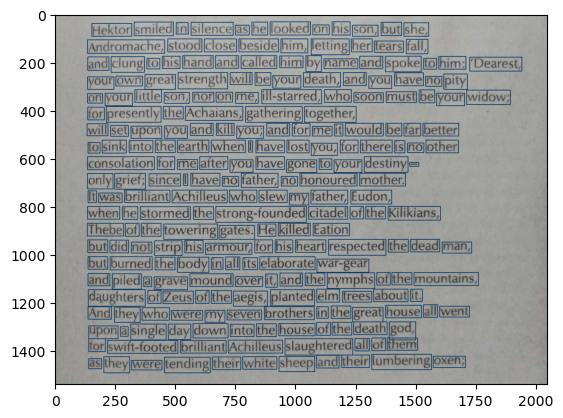

In [57]:
import os
import cv2
import tempfile
from concurrent.futures import ThreadPoolExecutor

img3 = img.copy()

# Assuming sorted_contours_lines is a list of contours
sorted_contours_lines = sorted(sorted_contours_lines, key=lambda line: (cv2.boundingRect(line)[1], cv2.boundingRect(line)[0]))

# Variable to store predictions with order
all_predictions_with_order = []

def process_line(line, line_order):
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y + h, x:x + w]

    # Connected Component Analysis (CCA) for word detection
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(roi_line, connectivity=8)

    # Filter out small components (adjust min_size as needed)
    min_size = 500
    valid_stats = [stat for stat in stats[1:] if stat[4] > min_size]

    # Create bounding boxes for valid components
    words = [(stat[0], stat[1], stat[0] + stat[2], stat[1] + stat[3]) for stat in valid_stats]

    # Sort words based on the x-coordinate of the bounding boxes
    sorted_words = sorted(words, key=lambda box: box[0])

    with tempfile.TemporaryDirectory() as temp_dir:
        batch_temp_file_paths = []

        for word_box in sorted_words:
            x2, y2, x2_end, y2_end = word_box
            cv2.rectangle(img3, (x + x2, y + y2), (x + x2_end, y + y2_end), (0, 50, 100), 2)
            cropped_img = img3[y + y2: y + y2_end, x + x2: x + x2_end]

            # Save the cropped image to a temporary file
            temp_file_path = os.path.join(temp_dir, "temp_cropped_img{}.png".format(len(batch_temp_file_paths)))
            cv2.imwrite(temp_file_path, cropped_img)
            batch_temp_file_paths.append(temp_file_path)

        # Execute the script with the paths to the temporary files (batch)
        prediction_batch = !python src/predict.py {" ".join(batch_temp_file_paths)}

        # Concatenate predictions with space between words
        line_prediction = " ".join(prediction_batch)
        all_predictions_with_order.append((line_order, line_prediction))

# Use ThreadPoolExecutor's map method to maintain order
with ThreadPoolExecutor() as executor:
    for i, line in enumerate(sorted_contours_lines):
        executor.submit(process_line, line, i)

# Sort predictions based on original order
all_predictions_with_order.sort(key=lambda x: x[0])

# Extract predictions for the final result
all_predictions_result = "\n".join(prediction for _, prediction in all_predictions_with_order)

# Print or use the 'all_predictions_result' variable as needed
print(all_predictions_result)

plt.imshow(img3)
plt.show()


hektor smiled in silence as he looked on his sonn but shel
u
andromacher stood close beside him letting her tears falll
and clung io his hand and called him by name and spoke to hims dearest
youn own it great strength willi be your deathy and you havel no pity
on it your little sonn nor on mel illuaed whol soon must be your widown
for presently the achaiansi gathering together
ol
willl set upon you and killl youp land for me it would be far better
io sink into the earth whenl l havel lost your for there is no other
di
consolation for me after you havel gone to your destiny pl 5
only grief since i havel no father no honoured motheri
lt was brilliant achilleus whol slew my father eudont
wheni he stormed the strongfounded citadel of the kilikiansa
thebe of the towering gatest he killed eation
but did not strip his armoun it it for his heart respected the dead mann
but burned the body in all its elaborate wargear
and piled a grave mound it over it land the it nymphs of it the it mountains


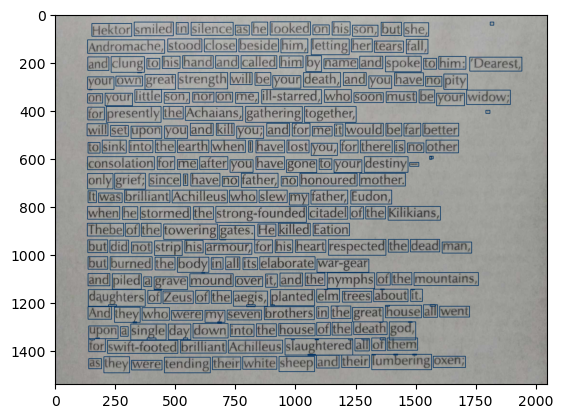

In [21]:
import os
import cv2
import tempfile
from concurrent.futures import ThreadPoolExecutor

img3 = img.copy()

# Assuming sorted_contours_lines is a list of contours
sorted_contours_lines = sorted(sorted_contours_lines, key=lambda line: (cv2.boundingRect(line)[1], cv2.boundingRect(line)[0]))

# Variable to store predictions with order
all_predictions_with_order = []

def process_line(line, line_order):
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y + h, x:x + w]

    (cnt, _) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours_words = sorted(cnt, key=lambda cntr: cv2.boundingRect(cntr)[0])

    with tempfile.TemporaryDirectory() as temp_dir:
        batch_temp_file_paths = []

        for word in sorted_contours_words:
            x2, y2, w2, h2 = cv2.boundingRect(word)
            cv2.rectangle(img3, (x + x2, y + y2), (x + x2 + w2, y + y2 + h2), (0, 50, 100), 2)
            cropped_img = img3[y + y2: y + y2 + h2, x + x2: x + x2 + w2]

            # Save the cropped image to a temporary file
            temp_file_path = os.path.join(temp_dir, "temp_cropped_img{}.png".format(len(batch_temp_file_paths)))
            cv2.imwrite(temp_file_path, cropped_img)
            batch_temp_file_paths.append(temp_file_path)

        # Execute the script with the paths to the temporary files (batch)
        prediction_batch = !python src/predict.py {" ".join(batch_temp_file_paths)}

        # Concatenate predictions with space between words
        line_prediction = " ".join(prediction_batch)
        all_predictions_with_order.append((line_order, line_prediction))

# Use ThreadPoolExecutor's map method to maintain order
with ThreadPoolExecutor() as executor:
    for i, line in enumerate(sorted_contours_lines):
        executor.submit(process_line, line, i)

# Sort predictions based on original order
all_predictions_with_order.sort(key=lambda x: x[0])

# Extract predictions for final result
all_predictions_result2 = "\n".join(prediction for _, prediction in all_predictions_with_order)

# Print or use the 'all_predictions_result' variable as needed
print(all_predictions_result2)

plt.imshow(img3)
plt.show()


In [1]:
import re
from spellchecker import SpellChecker


def perform_spell_check(text):
    spell_checker = SpellChecker(distance=1)

    # Split the text into lines
    lines = text.split('\n')

    corrected_lines = []
    for line in lines:
        words = re.findall(r'\b\w+\b', line)  # Extract individual words

        # Handle None values from spell_checker.correction()
        corrected_words = []
        for word in words:
            # Check if the word is highly misspelled (distance greater than max_distance)
            correction = spell_checker.correction(word)
            distance = spell_checker.distance(word, correction)  # Use a different variable name for distance
            print(distance)
            if correction is not None and distance <= max_distance:
                corrected_words.append(correction)
            else:
                # Include the original word if the correction is not significantly better
                corrected_words.append(word)

        corrected_line = ' '.join(corrected_words)
        corrected_lines.append(corrected_line)

    corrected_text = '\n'.join(corrected_lines)
    return corrected_text

spell_checked_text = perform_spell_check(all_predictions_result)

# Print the spell-checked text
print("Spell Checked Text:", spell_checked_text)


NameError: name 'all_predictions_result' is not defined

Spell Checked Text: hector smiled in silence as he looked on his son but she
andromache stood close beside him letting her tears fall
and clung to his hand and called him by name and spoke to hims dearest
you down great strength will be your death and you have no pity
on your little son nor on me illumed who soon must be your widow
for presently the achaianst gathering together
will set upon you and kill you and for me it would be far better
i sink into the earth when i have lost you for there is no other
consolation for me after you have gone to your destiny pal
only grief since i have no father no honored mother
it was brilliant chillers who slew my father eudont
when he stormed the strongfounded citadel of the kilikiansa
thebe of the towering latest he killed nation
but did not strip his around for his heart respected the dead man
but burned the body in all its elaborate larger
and piled i grave mound over it and the nymphs of the mountains
daughters of zebus of the aegis planted el

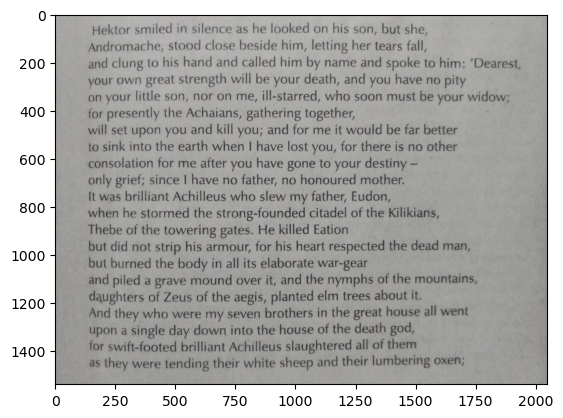

In [29]:
import re
from spellchecker import SpellChecker

def perform_spell_check(text):
    spell = SpellChecker()

    # Split the text into lines
    lines = text.split('\n')

    corrected_lines = []
    for line in lines:
        words = re.findall(r'\b\w+\b', line)  # Extract individual words

        # Handle None values from spell.correction()
        corrected_words = []
        for word in words:
            correction = spell.correction(word)
            corrected_words.append(correction if correction is not None else word)

        corrected_line = ' '.join(corrected_words)
        corrected_lines.append(corrected_line)

    corrected_text = '\n'.join(corrected_lines)
    return corrected_text

spell_checked_text = perform_spell_check(all_predictions_result)


#print("Original Text:", input_text)
print("Spell Checked Text:", spell_checked_text)
plt.imshow(img)